In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Gold.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,1300.760,1313.075,1316.08375,1300.6425
1,2018-01-02,1302.910,1316.500,1318.91000,1302.8550
2,2018-01-03,1318.375,1318.875,1321.30000,1307.7100
3,2018-01-04,1313.105,1327.875,1327.87500,1306.0500
4,2018-01-05,1322.050,1319.590,1323.50500,1313.9100


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

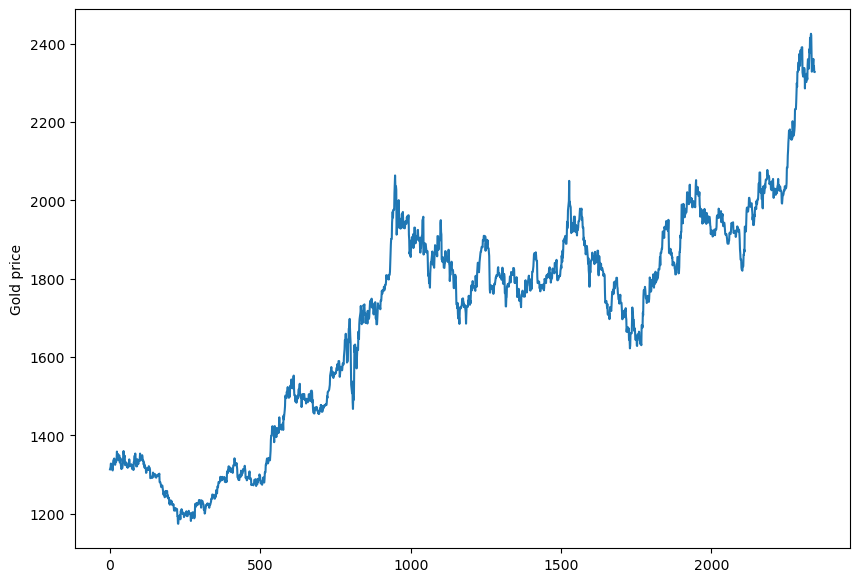

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Gold price")
plt.show()


In [6]:
t = .6
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.54924709430082
c:  1163.0494052294919


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1935.290820
1,1935.840067
2,1936.389314
3,1936.938561
4,1937.487808
...,...
933,2447.738359
934,2448.287606
935,2448.836853
936,2449.386100


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 14.505544215474906
Mean Squared Error (MSE): 87892.37586129393
Root Mean Squared Error (RMSE): 296.46648353784263


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2450.48459427 2451.03384136 2451.58308846 2452.13233555 2452.68158265
 2453.23082974 2453.78007684 2454.32932393 2454.87857103 2455.42781812
 2455.97706521 2456.52631231 2457.0755594  2457.6248065  2458.17405359
 2458.72330069 2459.27254778 2459.82179487 2460.37104197 2460.92028906
 2461.46953616 2462.01878325 2462.56803035 2463.11727744 2463.66652453
 2464.21577163 2464.76501872 2465.31426582 2465.86351291 2466.41276001
 2466.9620071  2467.51125419 2468.06050129 2468.60974838 2469.15899548
 2469.70824257 2470.25748967 2470.80673676 2471.35598385 2471.90523095
 2472.45447804 2473.00372514 2473.55297223 2474.10221933 2474.65146642
 2475.20071351 2475.74996061 2476.2992077  2476.8484548  2477.39770189
 2477.94694899 2478.49619608 2479.04544317 2479.59469027 2480.14393736
 2480.69318446 2481.24243155 2481.79167865 2482.34092574 2482.89017283
 2483.43941993 2483.98866702 2484.53791412 2485.08716121 2485.63640831
 2486.1856554  2486.73490249 2

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

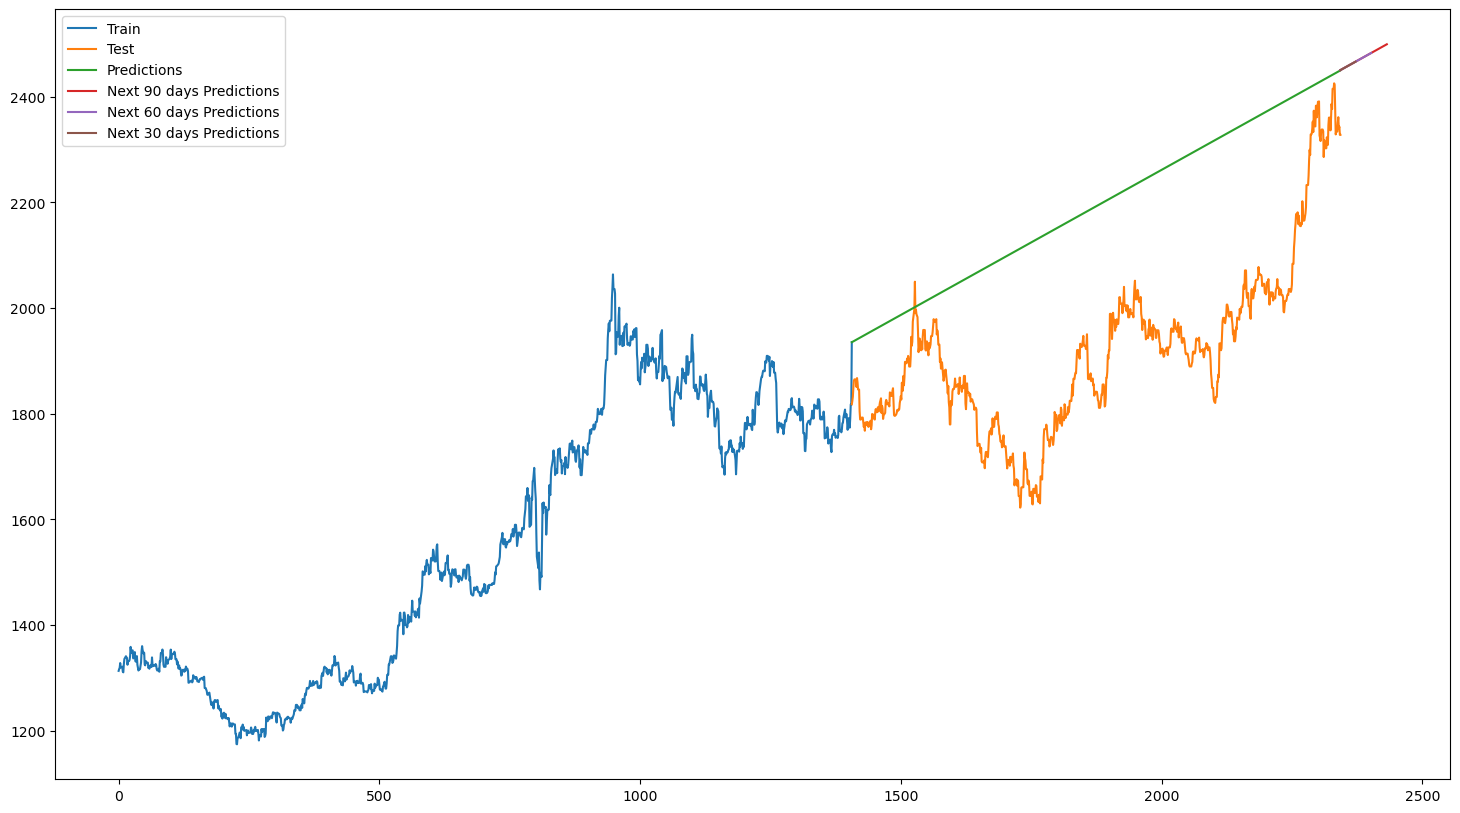

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()